<div align="center">

## Report
</div>

### 2. (c) Manual Examination of the LCS length matrix for set_strings

[Matrix](https://postimg.cc/R60hk1m3)

We can infer a number of insights as we analyze the LCS length matrix for the given set of strings. E.g., a higher LCS length may indicate a greater degree of similarity between two genes (not the composition of the gene itself), which would allow us to say that these pairs may be more closely related.

For instance, looking at the matrix, the gene pair (a, g) with an LCS length of 122 indicates a strong relationship (relatively strongest out of everyone). This may be an indication that they are directly related (parent-child relationship). Conversely, the pair (b, g) with an LCS length of 89 is relatively less related compared to the others (maybe not directly related: parent-grandchild?).

One noticeable pattern is that string 'f' tends to have higher LCS length than most other strings, suggesting it could be centrally located in the genealogy tree. Specifically, it has the highest LCS length with 'a' (113) (), which is the second-highest value in 'a' row, only surpassed by its LCS with 'g'. Following this pattern, we also observe the following:

* Gene 'a' aligns closely with 'f' and 'g'.
* Gene 'b' aligns closely with 'e' and 'd'.
* Gene 'c', while having moderate LCS lengths overall, aligns slightly closer to 'f' and 'g'.
* Gene 'd' aligns closely with 'b' and 'e'.
* Gene 'e' aligns closely with 'b' and 'd'.
* Gene 'f' aligns closely with 'g' and 'a'.
* Gene 'g' aligns closely with 'a' and 'f'.

To get an overall better outlook, I summed up every alphabet's score row-wise (omitting its score with itself):

* A : 620
* B : 601
* C : 590
* D : 616
* E : 622
* F : 641
* G: 603

When we look at the sums provided for each string, where 'f' scores the highest with a total LCS length of 641, this hypothesis is strengthened. 'f' appears to have an overall stronger relationship across the board. As there are only 3 levels in our tree, 'f' may be in the middle level in the genealogy tree if we were to reconstruct it based on these LCS lengths.

On the other end of the spectrum, string 'c' has the lowest LCS lengths when paired with other strings, totaling 590. This implies that other strings have diverged more from 'c,' which in genealogical terms suggests that 'c' was one of the older sequences. Given this, it's plausible to use 'c' as the root of our genealogy tree, branching out to the other sequences.

Excluding these two extremes, other genes may be taking the rest of the spots, but nothing can be said definitively yet. 

Although this first outlook guides the placement of nodes and the overall shape of the tree, we should implement local or global strategies for a more accurate tree construction when we're building a tree based on gene relationships, noticing how genes group together is really useful. Bigger LCS numbers might often suggest closer relationships, but that's not always the case because other factors can play a role. To be sure about which genes are closely related, we could try different methods and see if they give us similar results. This way, we get a clearer picture and can make stronger guesses about how the genes are related.

### 3. (a) Description of Local Strategy 

Our greedy approach will rely on the fact that the Longest Common Subsequence (LCS) lengths between gene strings can indicate their genetic similarity.

The algorithm will start by selecting a candidate for the root, which, based on prior analysis, I chose gene 'c'. With 'c' as my starting point, I will construct a binary tree where each node represents a gene connected to two children. These children are chosen based on their LCS scores with the parent, assuming that higher LCS scores reflect closer genetic ties. Here, we are applying an algorithm based on the idea that by picking the best options for parent genes step by step, we're building an efficient gene tree that should, in theory, be accurate. We assume that the choices we make at each step are the best ones all the way through. 

**Algorithmic Working:**

* We will first map each gene's identifier to its index to quickly access them during tree construction. Then, we will initiate a queue with the root node to support level-order tree construction.

* Next, we will calculate the total number of genes, which will also help determine the tree's required depth. Doing so will ensure that the tree is filled to an appropriate level corresponding to the number of genes we are dealing with.

* Then, for all gene pairs, we generate an LCS length matrix, which will serve as the basis for determining the relationships among genes (like the one we generated above).

* Now, we will employ breadth-first to add nodes to the tree iteratively. In every step, the algorithm determines the two best children based on the highest LCS scores from the LCS matrix. It is important to note that as it is a local strategy, we're only interested in the immediate connections — the direct parent-to-child links — rather than distant relations. This also means that even though a gene might be more similar to another gene if it is most similar to the current one, it will be selected. 

* For the current gene node, we will then go through the LCS scores to find the two genes with the highest scores that still need to be added to the tree. This is the 'greedy' aspect of the algorithm, as we are looking for the locally optimal choices to build the tree.

* Once the best candidates for children are identified, we instantiate new gene nodes and link them as left and right children of the current node, ensuring a binary tree structure.

* We will repeat these steps level by level until all genes are included or there are no more nodes to process.

* Finally, we will implement a recursive function to print the tree, which will display its structure and confirm the relationships inferred by the algorithm.

### 3. (b) Description of Global Strategy 

I’ve chosen to base the strategy on edit distances, specifically the Levenshtein distance for my global strategy. It calculates the number of insertions, deletions, and substitutions (mutation in our case) needed to transform one gene string into another. I think it is a fitting choice for a global strategy because it considers the entire genetic sequence and accounts for all possible changes, not just the longest common subsequence as in our greedy approach.


**How does the Levenshtein Distance strategy work:**

* It is a grid-based method where each cell represents a step in transforming one string to another. It starts from the grid's top-left corner, corresponding to the empty string, and progresses right and downward.

* In each cell, we have three options depending on whether the string characters match or differ. We might proceed without changes if they match or consider an edit if they differ. The edits are insertions, deletions, or mutations, each adding one to our edit count if performed.

* After populating the grid, the bottom-right cell gives us the Levenshtein distance, which reflects the fewest edits needed to match the strings completely.


**How do we discover the Optimal Tree Structure:**

* We will calculate all permutations of our seven genes, leading to a factorial number of possible trees.
* Because we know that gene pairs are finite, we can calculate the Levenshtein distance for all possible pairs.
* With the distances known, we will then evaluate each tree permutation's score by summing its pair distances.
* The tree with the smallest sum of distances will emerge as the optimal structure.


**Algorithmic Working:**

* First, we will calculate the edit distances between all pairs of gene strings. The matrix we build will measure the distance while also tracksing the specific changes made (will be useful when estimating the probabilities).

* We then utilize the total edit distances calculated for each tree configuration. Each tree is assessed by summing up the Levenshtein distances for each pair of connected nodes within the tree—this includes every parent to child connection. 

* A lower cumulative edit distance indicates a tree structure that is more historically plausible, suggesting that the genes within have undergone fewer alterations from one another through evolutionary history. 
    
* Thus, the tree with the lowest total edit distance across all its connections is considered the best representation of the genealogical relationships. It will reflect a configuration where genetic changes are minimized across generations. We are ensuring that the resulting tree configuration is globally optimal, not just a series of locally optimal choices.

* When we have successfully identified the best gene arrangement, we construct the tree. We perform this step recursively, making sure each node is placed at the correct level and in the correct position. We want to assure that the tree reflects the gene sequence order we determined to be optimal earlier.

* Finally we visualize the tree to verify the tree structure and ensure it makes sense.


Our algorithm taps into dynamic programming principles due to the optimal substructure and overlapping subproblems in our gene strings. As we break the problem down and tackle smaller sections, the solution to each part helps in constructing the final answer. As we address these subproblems (the edit distances between every pair of genes) and build up to the solution (the genealogy tree), we are assured that the global solution benefits from the optimality of its parts. Since the edit distances also contain within them the optimal steps to transform one gene into another, they guarantee that the total score for any tree configuration is reflective of the most efficient global relationship mapping.

Although this approach is comprehensive, it is also computationally intensive because we evaluate all possible permutations (factorial nature) of gene sequences. Nonetheless, it provides a valuable contrasting method to the greedy strategy. It’s a holistic way of looking at the entire dataset, ensuring that the tree structure we arrive at is not just a convenient fit (looking at you greedy) but a globally justified representation of the genealogical relationships.


### 3. (c) Insights and Comparison from the two strategies

**Greedy Approach:**

[Greedy Tree](https://postimg.cc/jwmc30kC)


The tree generated using the greedy approach suggests a lineage where:

* 'c' serves as the root (becuase we selected).
* 'g' and 'f' branch directly from 'c'.
*  'g' leads to 'a' and 'd', and 'f' leads to 'e' and 'b'.

This is due to the greedy algorithm's reliance on immediate LCS values. We knew as we were implementing it that it will prioritize local optimal solutions without considering the broader context of the entire dataset. I assume that the the greedy tree would be quicker to compute the tree, but might not always capture accurate relationships because it does not evaluate all possible configurations. We will later do an in-depth complexity analysis as well. To enhance the greedy approach, we could adopt the Levenshtein distance instead of LCS here as well, which might yield more reliable results. I think it's probable because Levenshtein distance accounts for the number and type of edits needed to transform one gene into another. That is not influenced as much by gene length variations and is more reflective of true genetic modifications.


**Global Approach:**

[Global Tree](https://postimg.cc/14DD1q8v)

The tree generated using the global approach suggests a lineage where:

* 'c' serves as the root.
* 'e' and 'g' branch directly from 'c'.
* 'e' leads to 'b' and 'd', and 'g' leads to 'a' and 'f'.

This structure differs from the greedy one because it relies on a more comprehensive analysis. I assume that this likely provided a configuration that is closer to the actual genealogical relationships due to its global approach. Although this will be computationally intensive due to its factorial nature, it does employ the more reliable, Levenshtein distance strategy. Although better, I assume that the main challenge with the global strategy will be its scalability. One possible improvement could be limiting the number of permutations it analyzes by setting a threshold, such as exploring only the top 500 combinations. That could theoretically help in managing the computational load while still maintaining some degree of accuracy. We could we tailor it to an acceptable error margin which we could predefine as per the requirements of the research.

### 4. Greedy Approach Complexity Analysis

[Greedy Complexity Analysis](https://postimg.cc/Z9DBxNTZ)

The complexity analysis of the greedy approach for constructing genealogy trees is reflected in the experimental plot shown in the image. This graph shows the relationship between the number of genes in a set and the average runtime required to construct their genealogy tree using the greedy algorithm.

**Interpretation**

* I created gene sets of increasing size, with random gene sequences of lengths between 89 and 122 characters. 

* For each gene set, I ran the greedy tree construction algorithm twice to mitigate random fluctuations in runtime and took the average.

* The average runtimes were plotted against the number of genes in each set, producing the curve seen in the graph. 

* We see from the output that as we double the gene count from 20 to 40, the runtime doesn’t simply double but increases by a factor of approximately 3.57, which indicates that the algorithm scales almost quadratically. (I even got 4.1  in one of the experiments)

* The computational complexity of the algorithm appears to scale almost quadratically with respect to the number of genes, denoted as N. We based it on the experimental data that shows a runtime increase by a factor of approximately 3.5 to 4.1 when the number of genes is doubled.

* While keeping in mind the length of a gene, denoted as M, and the number of genes, N, my algorithm's scaling is influenced by the LCS computation between gene pairs. Typically, the LCS operation has a complexity of O(M^2) when comparing two sequences of length M.

* However, in our approach, this LCS computation is not just a one-off calculation; it's performed for each unique pair of genes within the dataset. So, if we have N genes, there are O(N^2) pairings for which we need to compute the LCS. As we factor in both the number of genes and the average length of the genes, the overall time complexity of these operations becomes O(N^2 * M^2).

* However, because we have capped the maximum length of a gene sequence to 122, the M in our complexity becomes a constant factor, effectively normalizing the LCS computation time across all gene pairs. This simplifies our overall time complexity to O(N^2). This quadratic scaling with respect to N aligns with the experimental observations from our plot. 

* The growth rate of the algorithm's runtime increases with the square of the number of genes present, assuming a fixed gene length M. By capping M at 122, the LCS computation becomes a constant-time operation for each pair of genes. Therefore, the complexity is dominated by the number of gene pairs, which is proportional to N squared, leading to an overall quadratic increase in runtime as the number of genes increases.

* Once we fix the length of gene sequences, we focus on the N^2 component as the primary driver of computational complexity when we construct our genealogy binary trees.


### 4 Global Approach Complexity Analysis
[Global Complexity Analysis](https://postimg.cc/4KMy9T5x)


* The average runtime seen in the graph increases significantly as the number of genes grows, with a particularly steep rise noted between the points representing 7 and 8 genes. This suggests a super-linear growth in runtime, with the plot indicating a possible cubic time complexity trend.

* In the dynamic approach, the usage of the permutations function is likely the primary contributor to this scaling behavior. The permutations function considers all possible orderings of the input, which, for N genes, involves generating N! permutations. We iterate over the gene set in multiple nested loops, which leads to a factorial time complexity in theory.

* However, the runtime increase ratio of about 13.13, as noted between the gene sets from 4 to 8, doesn't strictly suggest factorial growth. Moreover, the smaller scale of N in the experiment may not be large enough to fully manifest the factorial growth rate.

* It's important to emphasize that while the experimental data implies a cubic growth rate, we should be cautious before drawing firm conclusions about the complexity based solely on this evidence. As the number of genes further increases, the runtime may start to reflect the factorial complexity more accurately. For larger values of N, the expected trend of a factorial increase in runtime would likely become more apparent. It will probably overshadow the cubic or any lower-degree polynomial growth suggested by the smaller-scale experiment.

* Overall, we can conclude by saying that the experimental plot aligns with a cubic growth pattern for the global approach. Our algorithm may handle smaller datasets within a reasonable time frame, its use for larger gene sets will likely be limited by steep increases in computational demands.

### 5. Probability Estimation and assessment of results


**Probability Estimation:**

In order to estimate the probabilities of insertions, deletions, and mutations from our dataset, we will leverage the concept of edit distance—specifically, the Levenshtein distance, that we used while employing our global strategy. 

To recall,the edit distance between two genes quantifies the number of single-character edits needed to change one gene into the other. 

Based on that, my approach involves:

* Constructing a Levenshtein matrix for each pair of parent and child genes to calculate the total number of operations (insertions, deletions, and mutations) needed for transformation.

* Backtracking through the matrix to determine the actual sequence of edits performed, as each operation represents a probability of genetic change.

* Then we will sum the counts of each operation type across all parent-child pairs.

* We will then normalize these counts by the length of the parent gene sequence to obtain a ratio, as every character has a certain likelihood of being involved in an edit operation.

* Finally, we will average these ratios across all parent-child pairs to mitigate random variations and provide a more general probability estimate.


**Key Algorithmic Components:**

* Edit Distance Calculation (edit_distance): We use previously implemented edit distance, implemented using the Levenshtein distance algorithm. The edit distance provides a numerical measure of divergence between two sequences.

* Tree Traversal and Probability Computation: 
    * Pre-Constructed Tree: The code will use a previously constructed binary tree which is also built using the greedy LCS-based strategy. 
    * Recursive Traversal (traverse): The compute_gene_stats function uses a recursive helper function (traverse) to navigate the tree structure.
    * As we traverse, we make comparisons between parents and their direct child nodes.
    * Normalization: For each parent-child pair, edit distances (counts of insertions, deletions, and substitutions) are obtained from the edit_distance function. Then counts are divided by the length of the parent gene sequence, yielding probabilities of those edit operations occurring within that lineage.

* Data Structure (ops_count):
    * Probabilities for each edit operation type are accumulated within a dictionary for all the parent-child relationships across the entire tree.

* The final calculation involves finding average probabilities for insertions, deletions, and substitutions over the entire tree.

*The results are printed.


**Average Edit Operation Probabilities:**
* **Insertions: 14.62%**
* **Deletions: 3.48%**
* **Substitutions: 10.48%**



**Assessment of results:**

The higher frequency of insertions suggests that the descendant genes are, on average, longer than their ancestors. The somewhat close ratio of insertions to substitutions implies a roughly equal chance for both events. Moreover, the relatively low probabilities imply that the transformation from parent to offspring involves a limited number of changes. A tree with even lower frequencies of these changes might be considered more refined or closer to an 'optimal' tree structure. However, it's crucial to acknowledge that these findings are specific to this particular small collection of genes and may not universally apply to larger genetic pools or across different species.

Also, we can see that insertions occur more frequently than deletions or mutations, which could hint at a trend toward increasing complexity within the genetic sequences over generational changes. We may associate it to environmental adaptation or other evolutionary pressures that favor the addition of new genetic material. If we consider the role of insertions in genetic diversity, it could suggest a tendency for these sequences to accumulate additional genetic material over time, which might have implications for functions or regulatory mechanisms in the organism.


<div align="center">

## Appendix
</div>

### LO/HC Justification

**cs-110professionalism:**  

In presenting my findings, I've maintained a professional tone with clear, well-organized points that facilitate easy comprehension. The document adheres to grammatical conventions and presents information systematically. I implemented a table of contents in the beginning and made sure to refer to course guide for good formatting. 

**cs110-AlgoStratDataStruct:** 

I have employed data structures to optimize the algorithms used. For instance, a queue facilitated efficient level-order tree traversal, and a set ensured quick look-ups for visited nodes. Each algorithm's choice reflected a deliberate decision to optimize performance and clarity. I made sure to elaborate as much as possible on my algorithmic thinking, and critiqued it so that it was easily interpretable by the reader. 

**cs110-CodeReadability:** 

The code's readability is supercharged by comprehensive docstrings for each function and thoughtful variable naming. I adopted a functional programming style, I've reduced repetition and enhanced the code's clarity. Comments are added throughout which aid in understanding the code's logic.

**cs110-ComplexityAnalysis:**

I conducted a thorough complexity analysis for both the greedy and dynamic approaches. Explained both the empirical data from runtime experiments and the theoretical expectations, revealing a near-quadratic and cubic growth, respectively. I averaged out the runtimes to remove fluctuations.

**cs110-ComputationalCritique:** 

I provide a critique on both local and global methods, analyzing their efficiencies and potential improvements. Through empirical testing and theoretical analysis, I identify each method's constraints and advantages, which are key for a nuanced computational critique.

**cs110-PythonProgramming:** 

My implementation includes robust Python functions, validated by assert statements across multiple test cases. The resulting genealogy trees and probability calculations are proof of the code's functional integrity.

**#Algorithms:** 

I break down both local and global algorithmic approaches step by step, clarifying complex concepts and providing detailed explanations of the processes. I also weigh the trade-offs between these approaches, justifying their respective efficiencies and limitations.

**#Probability:** 

I detail the calculation methods for estimating probabilities within gene relationships and explore the implications of these probabilities. Furthermore, I discuss how these statistical figures could be valuable in applications such as gene sequence prediction and tree optimization.

**#Induction:** 

Using inductive reasoning, I draw conclusions from the LCS matrix about gene relationships, with the strength of these inferences backed by the soundness of the observed patterns and the subsequent reliability of the results in my project's context.

### AI Statement:

* I used grammarly to fix all the grammatical errors throughout the paper.

* I would discuss the best strategies and data structures for my approaches with chatgpt.

* I used chatgpt to fix the bug in my code whenever I couldn't figure it out. 

* I used chatgpt to see if I could make my code better by enhancing readability for the reader. 

* I asked it to critique my code.

* I used it to brainstorm the algorithmic thinking behind the probability question.

### 1. Python implementation of Longest Common Subsequences and their lengths.

In [4]:
#Longest Common Subsequence
def lcs(gene1, gene2, len_gene1, len_gene2, dp):
    """
    Recursively identify all LCS given two input strings and their lengths.
    
    Parameters:
    ----------
    gene1, gene2 : str
        Input strings to determine the LCS.
    len_gene1, len_gene2 : int
        Lengths of the input strings gene1 and gene2 respectively.
    dp : list
        DP stores lengths of LCS for substrings of gene1 and gene2.

    Returns:
    ----------
    list
        Returns all the LCS as a list.
    """
    if len_gene1 == 0 or len_gene2 == 0:
        return [''] # Returning an empty list if either string length is zero.
    
    #checking if the current last characters of both input strings gene1 and gene2 are identical.
    if gene1[len_gene1 - 1] == gene2[len_gene2 - 1]:
        lcs_temp = lcs(gene1, gene2, len_gene1 - 1, len_gene2 - 1, dp)
        return [seq + gene1[len_gene1 - 1] for seq in lcs_temp]

    # Deciding the direction of movement in DP table depending on comparison of values.
    if dp[len_gene1 - 1][len_gene2] >= dp[len_gene1][len_gene2 - 1]:
        #calling lcs using recursion to compute the LCS for the substrings of gene1 and gene2 up to the second-to-last characters.
        top = lcs(gene1, gene2, len_gene1 - 1, len_gene2, dp) 
    else:
        top = []

    if dp[len_gene1][len_gene2 - 1] >= dp[len_gene1 - 1][len_gene2]:
        left = lcs(gene1, gene2, len_gene1, len_gene2 - 1, dp) # Exploring left if excluding current char from gene2 yields longer LCS.
    else:
        left = []

    return top + left

def lcs_lengths(gene1, gene2, matrix):
    """
    Fills in the DP matrix with the lengths of LCS of substrings gene1 and gene2.
    
    Parameters:
    ----------
    gene1, gene2 : str
        Strings for which the LCS length matrix is computed.
    matrix : list
        2D list (DP table) to store LCS lengths for substrings of gene1 and gene2.
    """
    for row in range(1, len(gene1) + 1):
        for col in range(1, len(gene2) + 1):
            if gene1[row - 1] == gene2[col - 1]:
                matrix[row][col] = matrix[row - 1][col - 1] + 1
            else:
                #maximum of the previously solved two subproblems
                matrix[row][col] = max(matrix[row - 1][col], matrix[row][col - 1])

def longest_common_subsequences(gene1, gene2):
    """
    Calculate all LCS and their lengths for two input strings.
    
    Parameters:
    ----------
    gene1, gene2 : str
        Strings to find the LCS of.

    Returns:
    ----------
    tuple
        A tuple containing the list of all LCS and the length of one LCS.
    """
    if not gene1 or not gene2:
        return (None, 0)  # Handling cases where one or both strings are empty.

    matrix = [[0] * (len(gene2) + 1) for _ in range(len(gene1) + 1)]
    lcs_lengths(gene1, gene2, matrix)  # Populating the LCS length matrix

    lcs_result = lcs(gene1, gene2, len(gene1), len(gene2), matrix)
    lcs_result = sorted(set(lcs_result))  # we remove the duplicates here and sort the list of LCS
    return (lcs_result, len(lcs_result[0]) if lcs_result else 0)

# test cases
x1, y1 = 'ABCBDAB', 'BDCABA'
x2, y2 = 'abc', ''
x3, y3 = 'abc', 'a'
x4, y4 = 'abc', 'ac'
x5, y5 = 'XMJYAUZ', 'MZJAWXU'
x6, y6 = 'stone', 'longest'

assert longest_common_subsequences(x1, y1) == (['BCAB', 'BCBA', 'BDAB'], 4)
assert longest_common_subsequences(x2, y2) == (None, 0)
assert longest_common_subsequences(x3, y3) == (['a'], 1)
assert longest_common_subsequences(x4, y4) == (['ac'], 2)
assert longest_common_subsequences(x5, y5) == (['MJAU'], 4)  
assert longest_common_subsequences(x6, y6) == (['one'], 3)


### 2 (a) & (b). LCS lengths matrix for set_strings.


In [5]:
#Just the length of the LCS
def lcs_length_only(gene1, gene2):
    """
    Computes only the length of the Longest Common Subsequence (LCS) between two strings.
    
    Parameters:
    ----------
    gene1, gene2 : str
        The input strings for which to compute the LCS length.

    Returns:
    ----------
    int
        The length of the LCS.
    """
    # Creating a DP table which has the dimensions (len(gene1)+1) * (len(gene2)+1)
    dp = [[0] * (len(gene2) + 1) for _ in range(len(gene1) + 1)]
    
    # Filling in the DP table
    for i in range(1, len(gene1) + 1):
        for j in range(1, len(gene2) + 1):
            if gene1[i - 1] == gene2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])
    
    # The length of the LCS will be in the bottom-right cell of the matrix
    return dp[-1][-1]

# test cases (I was procrastinating so I went a little overboard with the test cases)
x1, y1 = "", ""  
x2, y2 = "123456789", "24680"      
x3, y3 = "abcdefghi", "xyz"        
x4, y4 = "abcdefghi", "def"        
x5, y5 = "aaaabbbb", "baab"        
x6, y6 = "gattaca", "tacgat"     
x7, y7 = 'ABCBDAB', 'BDCABA'
x8, y8 = 'abc', ''
x9, y9 = 'abc', 'a'
x10, y10 = 'abc', 'ac'
x11, y11 = 'XMJYAUZ', 'MZJAWXU'
x12, y12 = 'stone', 'longest'

assert lcs_length_only(x1, y1) == 0
assert lcs_length_only(x2, y2) == 4
assert lcs_length_only(x3, y3) == 0 
assert lcs_length_only(x4, y4) == 3  
assert lcs_length_only(x5, y5) == 3  
assert lcs_length_only(x6, y6) == 4 
assert lcs_length_only(x7, y7) == 4
assert lcs_length_only(x8, y8) == 0
assert lcs_length_only(x9, y9) == 1
assert lcs_length_only(x10, y10) == 2
assert lcs_length_only(x11, y11) == 4 
assert lcs_length_only(x12, y12) == 3 


In [6]:
#LCS length matrix
import numpy as np
import pandas as pd

def len_lcs_matrix_generator(genes):
    """
    This function computes a matrix of LCS lengths for a list of gene sequences and their identifiers.
    
    Parameters:
    ----------
    genes : list of tuples
        List of tuples, where each tuple contains an identifier and a gene sequence.
    
    Returns:
    ----------
    DataFrame
        A DataFrame representing the LCS length matrix with labeled rows and columns.
    """
    n = len(genes)
    len_lcs_matrix = np.zeros((n, n), dtype=int)
    
    # Filling in the matrix with LCS lengths
    for i in range(n):
        for j in range(n):
            len_lcs_matrix[i][j] = lcs_length_only(genes[i][1], genes[j][1])

    # Extracting labels for DataFrame rows and columns from the gene identifiers
    gene_labels = [gene[0] for gene in genes]
    
    # Creating a DataFrame from the numpy array 
    lcs_df = pd.DataFrame(len_lcs_matrix, index=gene_labels, columns=gene_labels)

    return lcs_df

set_strings = [
('a','GGCGCCATGTTACAGGTCTTTATTTTGTTTCCAGCCAGAATTCAGACCGGGCAGTGTTCTAATCTTCCTTTACAGCAACGAAGTTACATACTAAAGCTGCGTTGGCTCTTGTACGCTAGCAGCAGGCGAGTTTTTACCTGTTGTGGCAAGA'),
('b','GGCACCTCGGAAGCTTTCCTATGGTTAACCAGGGAGTAATAAAAGGAATTCAACAAATTCCTATCATTCCCTACCATACCAGCCCTCCTAGAGTCATTTGTGTATTCGTGTTTATGTACGTGGGTTAAGCAGATAAGGAACCCAA'),
('c','GACCTCGTCAGCTTCAGTTTATCCAGCAGAATTCAGATGTCATAGTTCGTATCATTCCTGCAAAGAGTACTAGAAGCGTCATAGTCTTTTCTAATAGTACGAGGTTTACCTGTTTGGCAA'),
('d','GCACCTCGAGAGATCATTTGCCATGTAACTAAGCTGAATTTAAAGGATGTCCGACAGTTCCTTATCCTCTGCTCGATTACGATGCCCCTATATACGCATACTATGCCTGTCTAGTAGTACGTGGTGCTTAAACATAAGGGACCCAA'),
('e','GCACCTCGGAAGCTTTCCATGTTATACAAGCAGAATTAAAGATGTTCACAGTTCCTTTCATCCCTGCCAATACCAGCCCCTTAGAGCCCATATGTTCTATTCTATTATGTACGTGGGTTAACAGTATAGGACCAA'),
('f','CCGCACCGTTCAAGGCTTTCCATGGTGTTCGAGCCAGAATTCCAGATCGTCCAGGAGTTCATTATTCCTTTACTCCATTGAAGGTGACATAACTAACTGCCGTACAGTTGCTATGGATCTCAACCACTGAGGGGAGGAGGGTTTTACTGACTTGGTCAAA'),
('g','GCGCTCGTTCAGCTTTCATTTTCTTCCAGCCAGAATTCAGATCGTTCAGAGTTCTTAACTTCTTTACTGCAAAGAAGTTACTACAAAGCCGTCGTTGCTCTTGTCTCAACCAGCTAGGGAGGGTTTACCTGTTTGGCAAA')]

len_lcs_matrix = len_lcs_matrix_generator(set_strings)

print(len_lcs_matrix.iloc[0, 3]) #printing LCS length between gene 'a' and gene 'd' as per the question

len_lcs_matrix


96


,a,b,c,d,e,f,g
a,151,94,100,96,95,113,122
b,94,145,91,111,117,99,89
c,100,91,120,93,98,101,107
d,96,111,93,146,115,105,96
e,95,117,98,115,135,102,95
f,113,99,101,105,102,160,121
g,122,89,107,96,95,121,140


### 3 (a). Local Greedy Strategy

In [7]:
#Greedy Tree Construction
from collections import deque

class GeneTreeNode:
    """
    This class represents a node in a binary tree, where each node is associated with a gene name.

    Attributes
    ----------
    gene_name : str
        Name of the gene associated with this node.
    left_child : GeneTreeNode
        Left child of the current node.
    right_child : GeneTreeNode
        Right child of the current node.
    """
    def __init__(self, gene_name):
        """
        Initializes the node with a gene name, setting left and right children to None.

        Parameters
        ----------
        gene_name : str
            Name of the gene to be associated with this node.
        """
        self.gene_name = gene_name
        self.left_child = None
        self.right_child = None

    def build_greedy_tree(self, gene_pairs):
        """
        Builds a binary tree using a greedy algorithm based on the LCS scores.
        It will select two children for each node that have the highest LCS scores with the parent.

        Parameters:
        ----------
        gene_pairs : list of tuples
            A list where each tuple contains an identifier and a gene sequence.

        Returns:
        ----------
        None
            This method modifies the tree in place by adding nodes.
        """

        # here, we map each gene's identifier to its index for quick access during tree construction
        gene_to_index = {gene[0]: idx for idx, gene in enumerate(gene_pairs)}

        # extracting gene identifiers from the mapping
        gene_identifiers = list(gene_to_index.keys())

        # Calculating the total number of genes to figure out depth of the tree
        total_gene_count = len(gene_identifiers)

        # initializing a queue with the root node to facilitate level-order construction
        node_queue = deque([self])
        
        # initializing a set to track which genes have been added to the tree to avoid duplication
        visited_indices = set([gene_to_index[self.gene_name]])

        # computes the levels required in the tree based on the number of genes
        number_of_levels = 1 + total_gene_count.bit_length()

        # this generates the LCS length matrix for all gene pairs
        lcs_matrix = len_lcs_matrix_generator(gene_pairs)

        # using breadth-first approach, we build the tree until all levels are filled or no more nodes to process
        while node_queue and number_of_levels > 0:

            current_node = node_queue.popleft() # Dequeuing the front node to process its children
            
            current_gene_index = gene_to_index[current_node.gene_name] # Retrieving  index of the current node's gene from the mapping
            
            lcs_scores = lcs_matrix.iloc[current_gene_index,:].tolist() # row in LCS matrix corresponding to the current node's gene

            
            best_child_index = -1 # Initializing indices for selecting the best two children
            second_best_child_index = -1

            # Identifying the indices of the two genes with the highest LCS scores which are not yet added to the tree
            for index in range(len(lcs_scores)):
                if index not in visited_indices:
                    if best_child_index == -1 or lcs_scores[index] > lcs_scores[best_child_index]:
                        second_best_child_index = best_child_index
                        best_child_index = index
                    elif second_best_child_index == -1 or lcs_scores[index] > lcs_scores[second_best_child_index]:
                        second_best_child_index = index

            # Creating and linking nodes for the best two children if they are found
            for index in [best_child_index, second_best_child_index]:
                if index != -1 and index not in visited_indices:
                    visited_indices.add(index)
                    new_node = GeneTreeNode(gene_identifiers[index])
                    if not current_node.left_child:
                        current_node.left_child = new_node
                    else:
                        current_node.right_child = new_node
                    node_queue.append(new_node)

            # Decrementing the level counter after processing each node
            number_of_levels -= 1


    def printing_tree(self, node, level=0):
        """
        Recursively prints the tree structure starting from the given node.

        Parameters
        ----------
        node : GeneTreeNode
            The root node from which to start printing the tree.
        level : int, optional
            The current level of depth in the tree, used for formatting the output.
        """
        if not node:
            return
        self.printing_tree(node.left_child, level + 1)
        print(' ' * 4 * level + f'----> {node.gene_name}')
        self.printing_tree(node.right_child, level + 1)


#printing the tree
root_gene = GeneTreeNode("c")
root_gene.build_greedy_tree(set_strings)
root_gene.printing_tree(root_gene)

        ----> a
    ----> g
        ----> d
----> c
        ----> e
    ----> f
        ----> b


### 3 (b) Global Strategy

In [8]:
#Global Optimal Tree Arrangement
from itertools import permutations

def edit_distance(s1, s2):
    """
    This function calculates the Levenshtein distance between two strings, returning the counts of each edit operation needed
    (insertions, deletions, substitutions), which will help us with probability estimation as well. The Levenshtein distance measures
    the minimum number of single-character    edits required to change one string into another.

    Args:
        s1 (str): The first string.
        s2 (str): The second string.

    Returns:
        tuple: A tuple containing three integers representing the number of insertions, deletions, and substitutions
               required to transform the first string into the second string.
    """

    # Initializing the matrix with dimensions (len(s1)+1) x (len(s2)+1) filled with zeros
    length1, length2 = len(s1), len(s2)
    dp = [[0] * (length2 + 1) for _ in range(length1 + 1)]

    # Filling the first row and the first column of the matrix with incremental values
    # this represents the number of deletions needed to match an empty string
    for i in range(length1 + 1):
        dp[i][0] = i
    for j in range(length2 + 1):
        dp[0][j] = j

    # Filling in the rest of the matrix using dynamic programming approach
    for i in range(1, length1 + 1):
        for j in range(1, length2 + 1):
            if s1[i - 1] == s2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]  # if characters match, no operation needed
            else:
                #  if characters don't match, perform the operation with the minimum cost
                dp[i][j] = min(dp[i - 1][j] + 1,    # Deletion
                               dp[i][j - 1] + 1,    # Insertion
                               dp[i - 1][j - 1] + 1)  # Substitution

    # Backtracking from dp[length1][length2] to count the number of each operation
    i, j = length1, length2
    insertions, deletions, substitutions = 0, 0, 0
    while i > 0 and j > 0:
        if s1[i - 1] == s2[j - 1]:
            i -= 1
            j -= 1
        elif dp[i][j] == dp[i - 1][j] + 1:
            deletions += 1
            i -= 1
        elif dp[i][j] == dp[i][j - 1] + 1:
            insertions += 1
            j -= 1
        else:
            substitutions += 1
            i -= 1
            j -= 1

    # If one string is exhausted before the other, add the remaining characters as insertions or deletions
    insertions += j
    deletions += i

    return insertions, deletions, substitutions


In [9]:
def tree_score(gene_indices, distance_map):
    """
    Calculates the score of a tree configuration based on the edit distances between connected nodes. 
    Sums up the individual distances (edit operations including insertions, deletions, 
    and substitutions) for pairs of connected nodes to determine the overall score of a tree arrangement.

    Parameters:
    ----------
    gene_indices : list
        List of indices representing the gene order in the tree configuration.

    distance_map : dict
        Dictionary with the computed distances between gene pairs. 

    Returns:
    ----------
    int
        Total sum of distances between connected gene nodes in the tree. 
    """
    total_distance = 0  # Initializing total distance as zero
    num_genes = len(gene_indices)  # Number of genes in the tree

    # Iterating over each gene index to compute distances to its children
    for idx in range(num_genes - 1):  
        parent = gene_indices[idx]  

        # Calculating the index of the left child in a binary tree
        left_child = 2 * idx + 1
        if left_child < num_genes:  # Checks if the left child index is within bounds
            # distance tuple for the parent and left child
            ins, dels, subs = distance_map[(parent, gene_indices[left_child])] 
            total_distance += (ins + dels + subs) #Adding all edit operations

        # Calculating the index of the right child in a binary tree
        right_child = left_child + 1
        if right_child < num_genes:  # Checks if the right child index is within bounds
            # distance tuple for the parent and right child
            ins, dels, subs = distance_map[(parent, gene_indices[right_child])]
            total_distance += (ins + dels + subs) #Adding all edit operations

    return total_distance


def arrangement(gene_data):
    """
    Determine the optimal arrangement of genes to minimize
    the total edit distances between adjacent nodes.

    Parameters:
    ----------
    gene_data : list of tuples
        List containing tuples of gene identifiers and their corresponding sequences.

    Returns:
    ----------
    list
        List of gene identifiers in the optimal arrangement for the tree.
    """
    num_genes = len(gene_data)
    gene_ids = [gene[0] for gene in gene_data]
    distance_pairs = {}
    
    # Computing all pairwise edit distances and storing them symmetrically
    for i in range(num_genes):
        for j in range(i + 1, num_genes):
            gene1, gene2 = gene_data[i][0], gene_data[j][0]
            distance_pairs[(i, j)] = edit_distance(gene_data[i][1], gene_data[j][1])
            distance_pairs[(j, i)] = distance_pairs[(i, j)]

    all_trees = list(permutations(range(num_genes)))
    optimal_configuration, minimum_score = None, float('inf')

    # Evaluating each possible tree configuration to find the one with the lowest score
    for tree in all_trees:
        fitness_score = tree_score(tree, distance_pairs)
        if fitness_score < minimum_score:
            minimum_score = fitness_score
            optimal_configuration = [gene_ids[i] for i in tree]

    return optimal_configuration




In [10]:
#Binary Tree Generation for global approach
class TreeNode:
    """
    Represents a node within a binary tree structure.
    """
    def __init__(self, data):
        self.data = data
        self.left_child = None
        self.right_child = None

def populate_tree_by_level(order_list, current_index, total_items):
    """
    Recursively fills a binary tree in level order from a list of gene identifiers.
    
    Parameters:
    ----------
    order_list : list
        List containing gene identifiers to be placed in the tree.
    current_index : int
        Index in the list currently being used to create a node.
    total_items : int
        Total number of items in the list.
    
    Returns:
    ----------
    TreeNode
        The newly created node of the tree at the current index.
    """
    node = None  # Start with no node
    if current_index < total_items:  # This ensures the current index is within the list bounds

        node = TreeNode(order_list[current_index])  # new node with the current element

        # setting the left child by moving the index to the position of the left child
        node.left_child = populate_tree_by_level(order_list, 2 * current_index + 1, total_items)

        # setting the right child by moving the index to the position of the right child
        node.right_child = populate_tree_by_level(order_list, 2 * current_index + 2, total_items)

    return node  # newly created node

def dynamic_tree_generation(genes):
    """
    Constructs a binary tree from an optimal gene arrangement using the gene sequence data.
    
    Parameters:
    ----------
    genes : list of tuples
        Each tuple contains a gene identifier and its sequence.
    
    Returns:
    ----------
    TreeNode
        Root node of the constructed binary tree.
    """
    optimal_order = arrangement(genes)  # Determining the optimal order of genes
    root_node = populate_tree_by_level(optimal_order, 0, len(optimal_order))  # filling in the tree starting from the root
    return root_node  # Returning the root of the fully constructed tree

def visualize_tree(root, depth=0):
    """
    Prints the structure of the binary tree using recursion from the root to visualize its layout.
    
    Parameters:
    ----------
    root : TreeNode
        The root node or current node of the binary tree.
    depth : int
        Current depth in the tree to manage indentation for visualization.
    """
    if root is not None:  # Checking if the current node is None or not
        visualize_tree(root.left_child, depth + 1)  # printing the left subtree
        print(' ' * 4 * depth + f'----> {root.data}')
        visualize_tree(root.right_child, depth + 1)  #  printing the right subtree

binary_tree_root = dynamic_tree_generation(set_strings)  
visualize_tree(binary_tree_root)  

        ----> b
    ----> e
        ----> d
----> c
        ----> a
    ----> g
        ----> f


### 4. Complexity Analysis for Greedy Approach

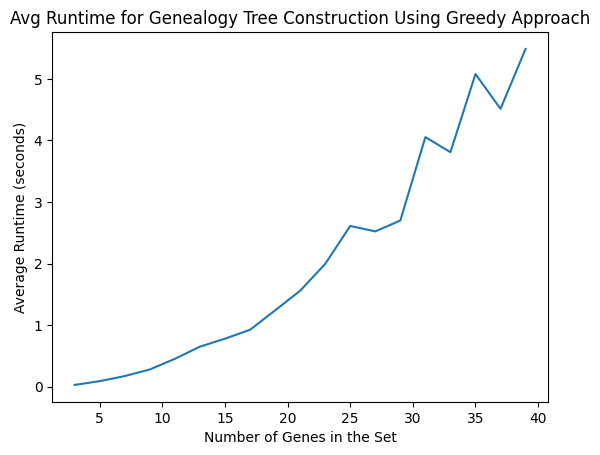

As we double the number of Genes in the Set from 20 to 40, the runtime ratio increases by: 3.517698453443541


In [11]:
#Complexity Analysis of the Greedy Approach
import random
import time
import matplotlib.pyplot as plt
import numpy as np

def generate_gene_set(n):
    """
    Generates sets of genes of increasing size.

    Parameters:
    ----------
    n : int
        The maximum number of genes in the largest set.

    Returns:
    ----------
    list of list of tuples
        A list containing sets of genes, where each set includes tuples of 
        gene identifier (a letter) and gene sequence (a string of 'A', 'G', 'C', 'T').
    """
    gene_choice = ["A", "G", "C", "T"]
    gene_sets = []
    for set_size in range(3, n, 2):  # step size is set to 2 because we don't want incomplete binary trees
        genes = []
        for i in range(set_size):
            # Generating random gene lengths between 89 and 122 these are the extremes our gene lengths were in the prompt
            gene_length = random.randint(89, 122)   
            gene_sequence = ''.join(random.choices(gene_choice, k=gene_length))
            genes.append((chr(97 + i), gene_sequence))  # Using letters 'a', 'b', ... as identifiers
        gene_sets.append(genes)
    return gene_sets

def greedy_plot(max_genes):
    """
    Measures and plots the runtime for constructing genealogy trees using the greedy approach, 
    storing runtimes at specific gene counts (approximately 20 and 40) and calculating their ratio.

    Parameters:
    ----------
    max_genes : int
        The maximum number of genes to consider (affects how many data points are plotted).

    Returns:
    ----------
    None
        This function plots the runtime performance graph and prints the runtime ratio.
    """

    average_runtimes = []
    gene_count_series = list(range(3, max_genes, 2))  # Numbers of genes to test
    all_gene_sets = generate_gene_set(max_genes)

    #this is to store the runtimes at 20 and 40 genes
    runtime_at_20 = None
    runtime_at_40 = None

    for i, gene_set in enumerate(all_gene_sets): 
        trial_runtimes = []
        for _ in range(2):  # Performing two trials for each gene set size
            root_gene = GeneTreeNode(gene_set[0][0])  # Initializing the tree 
            start_time = time.time()
            root_gene.build_greedy_tree(gene_set)  # Building the tree
            end_time = time.time()
            trial_runtimes.append(end_time - start_time)
        average_runtime = np.mean(trial_runtimes)
        average_runtimes.append(average_runtime)

        # Storing the runtimes for gene counts close to 20 and 40 (due to the step size)
        if abs(gene_count_series[i] - 20) <= 1:  
            runtime_at_20 = average_runtime
        if abs(gene_count_series[i] - 40) <= 1: 
            runtime_at_40 = average_runtime

    # Plotting
    plt.plot(gene_count_series, average_runtimes)
    plt.title('Avg Runtime for Genealogy Tree Construction Using Greedy Approach')
    plt.xlabel('Number of Genes in the Set')
    plt.ylabel('Average Runtime (seconds)')
    plt.show()

    # Calculating and print the runtime ratio
    if runtime_at_20 and runtime_at_40:
        runtime_ratio = runtime_at_40 / runtime_at_20
        print("As we double the number of Genes in the Set from 20 to 40, the runtime ratio increases by:", runtime_ratio) 
    else:
        print("Runtime measurements for 20 and 40 genes were not found.")

greedy_plot(41) 


### 4. Complexity Analysis for Global Approach

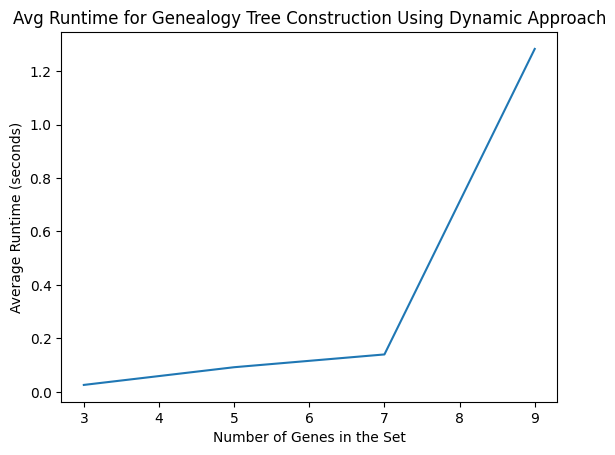

As we double the number of Genes in the Set from 4 to 8, the runtime ratio increases by: 13.903987450218251


In [12]:
#Complexity Analysis of the Global Approach
def dynamic_plot(n):
    """
    Measures and plots the runtime for constructing genealogy trees using dynamic programming.

    Args:
        max_sequences : int
            The maximum number of sequences to consider.

    Returns:
        None
        This function plots the runtime performance graph and prints the runtime ratio.
    """
    runtimes = []
    sequence_counts = list(range(3, n, 2))
    all_sequences = generate_gene_set(n)

    runtime_at_4 = None
    runtime_at_8 = None

    for i, sequence_set in enumerate(all_sequences):
        temp_runtimes = []
        for _ in range(2):  
            start_time = time.time()
            dynamic_tree_generation(sequence_set) 
            end_time = time.time()
            temp_runtimes.append(end_time - start_time)
        average_runtime = np.mean(temp_runtimes)
        runtimes.append(average_runtime)

        # Storing runtimes for sequence counts of 4 and 8
        if abs(sequence_counts[i] - 4) <= 1:  # Check if close to 4 
            runtime_at_4 = average_runtime
        if abs(sequence_counts[i] - 8) <= 1:  # Check if close to 8
            runtime_at_8 = average_runtime

    plt.plot(sequence_counts, runtimes)
    plt.title('Avg Runtime for Genealogy Tree Construction Using Dynamic Approach')
    plt.xlabel('Number of Genes in the Set')
    plt.ylabel('Average Runtime (seconds)')
    plt.show()

    # Calculate and print the ratio
    if runtime_at_4 and runtime_at_8:
        ratio = runtime_at_8 / runtime_at_4
        print("As we double the number of Genes in the Set from 4 to 8, the runtime ratio increases by:", ratio) 
    else:
        print("Runtime measurements for 4 and 8 sequences were not found.")

dynamic_plot(10) 

### 5 (b). Python implementation of Edit Operations' Probability estimation

In [13]:
def compute_gene_stats(root):
    """
    Computes the probabilities of edit operations (insertions, deletions, and substitutions) for a binary tree of genes.
    It traverses the tree and calculates these probabilities based on the edit distances between parent and child nodes.

    Args:
        root: TreeNode, the root of the gene tree.
    """
    gene_seqs = {
        'a': 'GGCGCCATGTTACAGGTCTTTATTTTGTTTCCAGCCAGAATTCAGACCGGGCAGTGTTCTAATCTTCCTTTACAGCAACGAAGTTACATACTAAAGCTGCGTTGGCTCTTGTACGCTAGCAGCAGGCGAGTTTTTACCTGTTGTGGCAAGA',
        'b': 'GGCACCTCGGAAGCTTTCCTATGGTTAACCAGGGAGTAATAAAAGGAATTCAACAAATTCCTATCATTCCCTACCATACCAGCCCTCCTAGAGTCATTTGTGTATTCGTGTTTATGTACGTGGGTTAAGCAGATAAGGAACCCAA',
        'c': 'GACCTCGTCAGCTTCAGTTTATCCAGCAGAATTCAGATGTCATAGTTCGTATCATTCCTGCAAAGAGTACTAGAAGCGTCATAGTCTTTTCTAATAGTACGAGGTTTACCTGTTTGGCAA',
        'd': 'GCACCTCGAGAGATCATTTGCCATGTAACTAAGCTGAATTTAAAGGATGTCCGACAGTTCCTTATCCTCTGCTCGATTACGATGCCCCTATATACGCATACTATGCCTGTCTAGTAGTACGTGGTGCTTAAACATAAGGGACCCAA',
        'e': 'GCACCTCGGAAGCTTTCCATGTTATACAAGCAGAATTAAAGATGTTCACAGTTCCTTTCATCCCTGCCAATACCAGCCCCTTAGAGCCCATATGTTCTATTCTATTATGTACGTGGGTTAACAGTATAGGACCAA',
        'f': 'CCGCACCGTTCAAGGCTTTCCATGGTGTTCGAGCCAGAATTCCAGATCGTCCAGGAGTTCATTATTCCTTTACTCCATTGAAGGTGACATAACTAACTGCCGTACAGTTGCTATGGATCTCAACCACTGAGGGGAGGAGGGTTTTACTGACTTGGTCAAA',
        'g': 'GCGCTCGTTCAGCTTTCATTTTCTTCCAGCCAGAATTCAGATCGTTCAGAGTTCTTAACTTCTTTACTGCAAAGAAGTTACTACAAAGCCGTCGTTGCTCTTGTCTCAACCAGCTAGGGAGGGTTTACCTGTTTGGCAAA'
    }

    ops_count = {'inserts': [], 'deletes': [], 'subs': []}

    def traverse(node):
        """ Helper function to traverse the tree and compute edit distances. """
        if node:
            if node.left_child:
                i, d, s = edit_distance(gene_seqs[node.data], gene_seqs[node.left_child.data])
                ops_count['inserts'].append(i / len(gene_seqs[node.data]))
                ops_count['deletes'].append(d / len(gene_seqs[node.data]))
                ops_count['subs'].append(s / len(gene_seqs[node.data]))
                traverse(node.left_child)
            
            if node.right_child:
                i, d, s = edit_distance(gene_seqs[node.data], gene_seqs[node.right_child.data])
                ops_count['inserts'].append(i / len(gene_seqs[node.data]))
                ops_count['deletes'].append(d / len(gene_seqs[node.data]))
                ops_count['subs'].append(s / len(gene_seqs[node.data]))
                traverse(node.right_child)

    traverse(root)

    # Calculating and printing the average probabilities for each type of edit operation
    avg_probs = {k: sum(v) / len(v) * 100 if v else 0 for k, v in ops_count.items()}
    print(f"Average Edit Operation Probabilities:")
    print(f"Insertions: {avg_probs['inserts']:.2f}%")
    print(f"Deletions: {avg_probs['deletes']:.2f}%")
    print(f"Substitutions: {avg_probs['subs']:.2f}%")

compute_gene_stats(binary_tree_root)

Average Edit Operation Probabilities:
Insertions: 14.62%
Deletions: 3.48%
Substitutions: 10.48%
